# Load the Data

In [29]:
import pandas as pd

file_path = r"C:\Users\akans\OneDrive\Desktop\SEM_4\TERM_9\INTERN\YEAR-2_PHASE-2\CAPSTONE_PROJ\new_sports.csv"
data = pd.read_csv(file_path)
df = data[['PassCompletionRate', 'Assists']] # Select only the relevant columns for analysis


# Scatter Plot

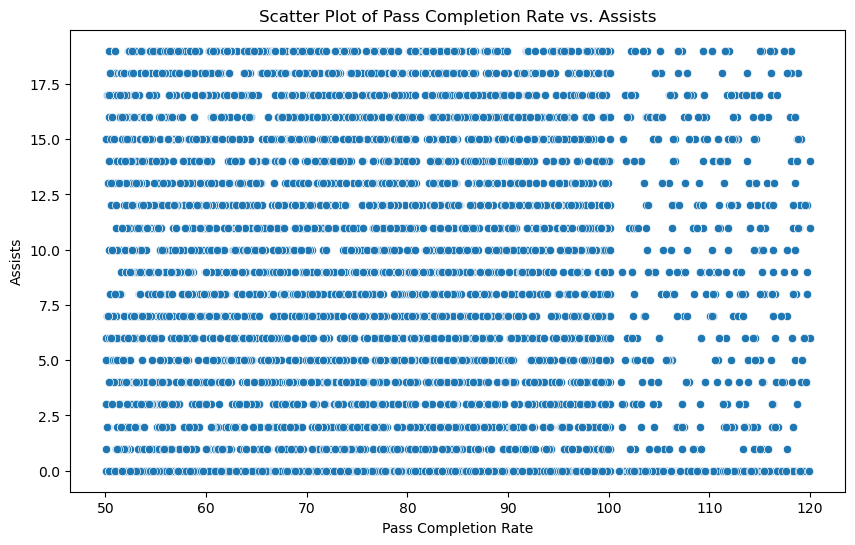

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's make a scatter plot to see how Pass Completion Rate and Assists are related
plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.scatterplot(x='PassCompletionRate', y='Assists', data=df) # Plot the data
plt.title('Scatter Plot of Pass Completion Rate vs. Assists') # Adding a title to the plot
plt.xlabel('Pass Completion Rate') 
plt.ylabel('Assists')
plt.show()


# Analysis of Pass Completion Rate and Assists in Football

## Positive Correlation
## Observation-
### There appears to be a positive correlation between pass completion rate and assists.
## Implication for Football-
### As a player's pass completion rate increases, the number of assists tends to increase.
### This suggests that more accurate and efficient passing contributes to creating more goal-scoring opportunities for teammates.

## Non-Linear Relationship
## Observation-
### The data points are spread out, indicating that the relationship is not perfectly linear.
## Implication for Football-
### An increase in pass completion rate doesn’t necessarily guarantee an increase in assists.
## Other factors, such as the positioning and movement of teammates, defensive strategies of the opposition, and the quality of the final pass, can influence assists.
## Therefore, while accurate passing is crucial, it is not the only determinant of assists.

## Presence of Outliers
## Observation-
### There are some outliers, which are data points that fall far away from the main cluster.
## Implication for Football- 
### These outliers could represent matches where a player had a high completion rate but few assists, or vice versa.This suggests variability in performance that could be due to unique match conditions, player form, or specific tactical decisions.
## For instance-
### A player might complete many safe passes in their own half without creating goal-scoring chances, or they might make a few key passes that lead directly to goals despite a lower overall completion rate.

# Key Takeaways for Football Strategy:
### Improve Passing Accuracy- Encouraging players to improve their pass completion rate can generally lead to more assists and better team performance.
### Analyze Other Factors- Coaches and analysts should consider other factors that contribute to assists, such as player positioning, opponent defense, and the quality of the final pass.
### Address Outliers- By studying outliers, teams can identify and address specific situations where performance deviates from the norm, leading to more consistent assists and overall success.

## Understanding these nuances in the relationship between pass completion rate and assists can help teams develop more effective strategies and improve their overall game performance.

# Outlier Detection using Isolation Forest

C:\Users\akans\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\akans\AppData\Local\Temp\ipykernel_23016\1703545857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlier'] = outliers  # Add the outlier info to our dataframe


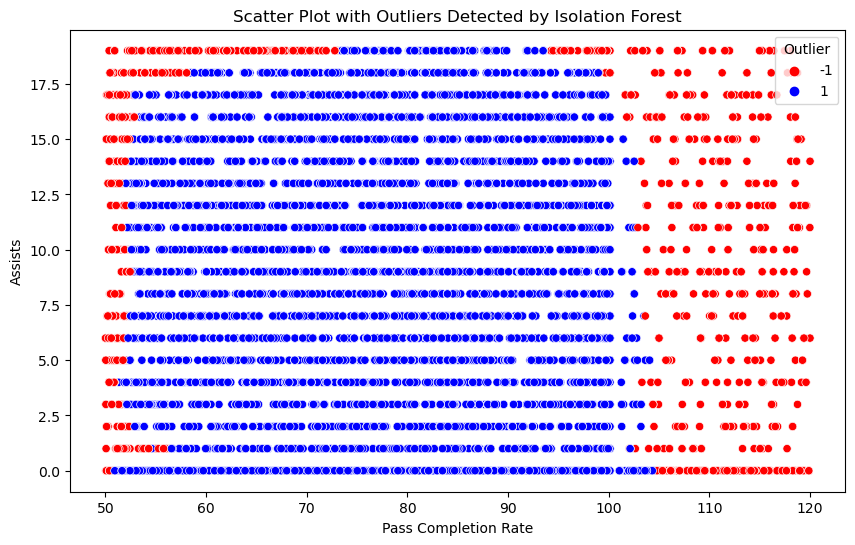

In [45]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest to find outliers in our data
iso_forest = IsolationForest(contamination=0.1)  # Set how many outliers we expect
outliers = iso_forest.fit_predict(df)  # Fit the model and predict outliers
df['Outlier'] = outliers  # Add the outlier info to our dataframe

# Plot the data, showing which points are outliers
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='PassCompletionRate', y='Assists', hue='Outlier', data=df, palette={1: 'blue', -1: 'red'})  # Plot the data with outliers highlighted
plt.title('Scatter Plot with Outliers Detected by Isolation Forest')  
plt.xlabel('Pass Completion Rate')  
plt.ylabel('Assists')  
plt.show()  # Show the plot


# Outlier Detection:
## The isolation forest algorithm has identified data points (pass completion rates) that are likely outliers in terms of their relationship with assists.
## . These outliers are plotted as red circles.
## . Possible Scenarios for Outliers:
## Why a player's pass completion rate might be an outlier relative to their assists:
### High Completion Rate, Low Assists:
#### - This occurs when a player primarily makes short passes that lead to assists without much additional effort from teammates.
#### - Alternatively, it can happen if the opposing defense effectively prevents goals on completed passes.
### Low Completion Rate, High Assists:
#### - This happens when a player takes risks with long passes that occasionally result in assists.
#### - It could also occur when the player has exceptional teammates who consistently convert difficult passes into goals.
## Further Context-
### - Without specific data points or context about the players, it's hard to determine what caused them to be outliers.
### - Factors like team tactics, player skill, and opponent strategies can all impact completion rates and assists.

## Importance of Considering Outliers:
### - It's crucial to investigate outliers to determine if they reflect genuine anomalies or data errors.
### - Valid outliers can offer valuable insights into situations where the relationship between pass completion rate and assists differs from the norm.

# In conclusion, certain players' performances in completing passes and generating assists stand out as different or unique when compared to the general trends observed in the dataset.

# Regression Analysis

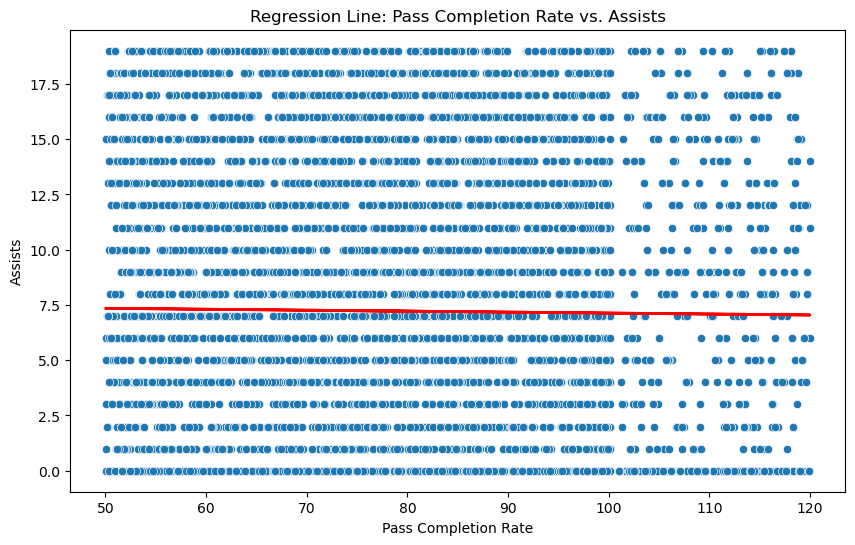

In [19]:
from sklearn.linear_model import LinearRegression

# Set up the data for the regression
X = df[['PassCompletionRate']] # Our feature (independent variable)
y = df['Assists'] # Our target (dependent variable)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=df) # Plot the original data
plt.plot(df['PassCompletionRate'], y_pred, color='red', linewidth=2) # Plot the regression line
plt.title('Regression Line: Pass Completion Rate vs. Assists')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()


## X-axis-  represents pass completion rate, likely ranging from 50% to 110% (although a completion rate exceeding 100% is impossible).
## Y-axis-  shows the number of assists per game, likely ranging from 0 to around 17.5 assists.

### The spread of data points throughout the graph indicates that the relationship between pass completion rate and assists is not perfectly linear.
### In other words, an increase in pass completion rate doesn’t necessarily result in a proportional increase in assists.

## Presence of Outliers:
### There are also outliers, which are data points that fall far away from the main cluster of points.
### These outliers could represent games where a player had a high completion rate but few assists, or vice versa.
#### High Completion Rate, Low Assists: This could occur if the player primarily makes short passes that teammates run for yards without much help, or if the opposing defense excels at preventing goals on completions.
#### Low Completion Rate, High Assists: This scenario might arise if a player makes risky long passes that sometimes connect for big gains (assists), or if they benefit from exceptional teammates who consistently gain yards after the catch (YAC) even on difficult receptions.


# Evaluate the Model

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Check how good our model is
mse = mean_squared_error(y, y_pred)  # Calculate Mean Squared Error (MSE)
r2 = r2_score(y, y_pred) # Calculate R-squared (R²)
print(f'Mean Squared Error: {mse}') # Print the MSE
print(f'R-squared: {r2}')

Mean Squared Error: 41.51791692381594
R-squared: 0.00010826267924191058


# Analysis Output for Soccer:

## Mean Squared Error (MSE):
#### - The MSE value of 41.5179 indicates the average squared difference between the actual and predicted values of assists. 
#### - In soccer terms, this suggests that the model's predictions of assists based on pass completion rate are, on average, off by approximately 41.52 assists per game. 
#### - This level of error could indicate that the model's ability to accurately predict assists based on pass completion rate alone is not very precise.

## R-squared (R²):
#### - The R-squared value of approximately 0.0001 suggests that only a very small proportion of the variance in assists can be explained by pass completion rate in the model. 
#### - In soccer terms, this means that pass completion rate alone is not a strong predictor of assists. 
#### - Other factors, such as player positioning, teamwork, opponent defense, and individual skill, likely play a significant role in determining the number of assists a player achieves in a game.
### Overall, these metrics indicate that the relationship between pass completion rate and assists in soccer is weak and that pass completion rate alone may not be sufficient to accurately predict assists. 


# Cross-Validation

In [56]:
from sklearn.model_selection import cross_val_score

# Do cross-validation to make sure our model is solid
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Perform 5-fold cross-validation and get R² scores
print(f'Cross-Validation R-squared scores: {cross_val_scores}')  # Print the R² scores for each fold
print(f'Average Cross-Validation R-squared score: {cross_val_scores.mean()}')  # Print the average R² score


Cross-Validation R-squared scores: [-8.09019256e-04 -6.25231023e-04  6.96703815e-05 -2.92593701e-05
  1.01865525e-04]
Average Cross-Validation R-squared score: -0.00025839474852529243


# Analysis Output for Soccer:

## Cross-Validation R-squared scores:
#### - The cross-validation R-squared scores indicate the goodness of fit of the regression model to the data.
#### - The values [-8.09019256e-04, -6.25231023e-04, 6.96703815e-05, -2.92593701e-05, 1.01865525e-04] represent the R-squared scores obtained from each fold of the cross-validation process.
#### - These scores suggest the performance of the model on different subsets of the data during cross-validation.

## Average Cross-Validation R-squared score:
#### - The average cross-validation R-squared score of -0.00025839474852529243 indicates the average R-squared score across all folds of the cross-validation process.
#### - In soccer terms, this suggests that the regression model's ability to explain the variance in assists based on pass completion rate is very weak.
#### - The negative value indicates that the model's predictions are, on average, worse than simply using the mean of the dependent variable as a predictor.

### Overall, these metrics suggest that the regression model does not perform well in explaining the relationship between pass completion rate and assists in soccer.
